In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_csv('regression_dataset.csv')
data.head()

,cases,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,pressure,tempC,visibility,winddirDegree,windspeedKmph,year,month,density_per_km,precipMM
0,2,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,1018,24,10,189,10,2016,3,0.505636,0.0
1,0,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,1018,24,10,189,10,2016,3,0.505636,0.0
2,1,-34.603684,-58.381559,24,7,0.0,11.6,5,87,6,14,15,14,16,0,59,1018,24,10,189,10,2016,3,0.505636,0.0
3,0,-34.603684,-58.381559,22,10,0.0,11.5,5,76,10,14,16,14,27,34,72,1025,22,10,99,18,2016,4,0.505636,0.0
4,1,-34.603684,-58.381559,22,10,0.0,11.5,5,76,10,14,16,14,27,34,72,1025,22,10,99,18,2016,4,0.505636,0.0


In [ ]:
X = data[['maxtempC', 'mintempC', 'windspeedKmph', 'year', 'month', 'density_per_km', 'precipMM', 'cloudcover',
       'humidity','DewPointC', 'latitude', 'longitude','FeelsLikeC', 'winddirDegree', 'sunHour']]
y = data['cases']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg_decision_model=DecisionTreeRegressor()
reg_decision_model.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
reg_decision_model.score(X_train,Y_train)

0.3822744843536132

In [ ]:
reg_decision_model.score(X_test,Y_test)

-0.8599639459010675

In [ ]:
prediction=reg_decision_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


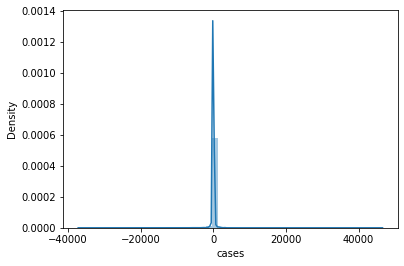

In [ ]:
import seaborn as sns
# checking difference between labled y and predicted y
sns.distplot(Y_test-prediction)

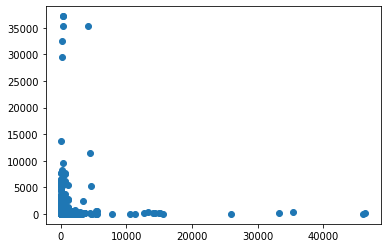

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,prediction)

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test,prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))
print('R2 score:', metrics.r2_score(Y_test, prediction))

MAE: 103.59850020924273
MSE: 902975.4037139268
RMSE: 950.2501795390132
R2 score: -0.8599639459010675


In [ ]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
from sklearn.model_selection import GridSearchCV

tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        #print(thour,":",tmin,':',round(tsec,2))

In [ ]:
%%capture
from datetime import datetime

start_time=timer(None)

tuning_model.fit(X,y)

timer(start_time)

In [ ]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 9,
 'max_features': 'log2',
 'max_leaf_nodes': 50,
 'min_samples_leaf': 10,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [ ]:
# best model score
tuning_model.best_score_

-527093.303751127

In [ ]:
tuned_hypermodel = DecisionTreeRegressor(max_depth=9, max_features='log2', max_leaf_nodes=50, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter='best')
tuned_hypermodel.fit(X_train,Y_train)
tuned_pred=tuned_hypermodel.predict(X_test)


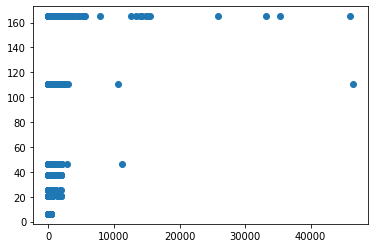

In [ ]:
plt.scatter(Y_test,tuned_pred)

In [ ]:
print('MAE:', metrics.mean_absolute_error(Y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(Y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, tuned_pred)))
print('R2 score:', metrics.r2_score(Y_test, tuned_pred))

MAE: 95.26206340021533
MSE: 482537.2705147672
RMSE: 694.6490268580005
R2 score: 0.006061602542480227
